In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-music-reviews/Musical_Instruments_5.json
/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv


In [2]:
df = pd.read_csv("../input/amazon-music-reviews/Musical_instruments_reviews.csv")

In [3]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [4]:
df.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [5]:
df.reviewText.fillna("",inplace = True)

In [6]:
del df['reviewerID']
del df['asin']
del df['reviewerName']
del df['helpful']
del df['unixReviewTime']
del df['reviewTime']

In [7]:
df.head()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.


In [8]:
df['text'] = df['reviewText'] + ' ' + df['summary']
del df['reviewText']
del df['summary']

In [9]:
df.head()

,overall,text
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...


In [10]:
def sentiment_rating(rating):
    
    if(int(rating) == 1 or int(rating) == 2 or int(rating) == 3):
        return 0
    else: 
        return 1
df.overall = df.overall.apply(sentiment_rating) 

In [11]:
df

,overall,text
0,1,"Not much to write about here, but it does exac..."
1,1,The product does exactly as it should and is q...
2,1,The primary job of this device is to block the...
3,1,Nice windscreen protects my MXL mic and preven...
4,1,This pop filter is great. It looks and perform...
...,...,...
10256,1,"Great, just as expected. Thank to all. Five S..."
10257,1,I've been thinking about trying the Nanoweb st...
10258,1,I have tried coated strings in the past ( incl...
10259,1,"Well, MADE by Elixir and DEVELOPED with Taylor..."


In [12]:
df.overall.value_counts()

1    9022
0    1239
Name: overall, dtype: int64

In [13]:
import re
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df.columns

Index(['overall', 'text'], dtype='object')

In [15]:
df.columns = ['Liked','Review']

In [16]:
df

,Liked,Review
0,1,"Not much to write about here, but it does exac..."
1,1,The product does exactly as it should and is q...
2,1,The primary job of this device is to block the...
3,1,Nice windscreen protects my MXL mic and preven...
4,1,This pop filter is great. It looks and perform...
...,...,...
10256,1,"Great, just as expected. Thank to all. Five S..."
10257,1,I've been thinking about trying the Nanoweb st...
10258,1,I have tried coated strings in the past ( incl...
10259,1,"Well, MADE by Elixir and DEVELOPED with Taylor..."


In [17]:
X=df.Review.astype('str')
y=df.Liked

In [18]:
X

0        Not much to write about here, but it does exac...
1        The product does exactly as it should and is q...
2        The primary job of this device is to block the...
3        Nice windscreen protects my MXL mic and preven...
4        This pop filter is great. It looks and perform...
                               ...                        
10256    Great, just as expected.  Thank to all. Five S...
10257    I've been thinking about trying the Nanoweb st...
10258    I have tried coated strings in the past ( incl...
10259    Well, MADE by Elixir and DEVELOPED with Taylor...
10260    These strings are really quite good, but I wou...
Name: Review, Length: 10261, dtype: object

In [19]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10256    1
10257    1
10258    1
10259    1
10260    1
Name: Liked, Length: 10261, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [22]:
vocab=1000
tokenizer=Tokenizer(vocab,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)


In [23]:
X_train[0]

"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing, good"

In [24]:
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)

In [25]:
train_sequence[0]

[114,
 1,
 1,
 48,
 1,
 350,
 447,
 15,
 63,
 680,
 81,
 489,
 1,
 2,
 1,
 125,
 1,
 250,
 1,
 5,
 490,
 1,
 7,
 229,
 33,
 3,
 880,
 1,
 193,
 11,
 1,
 12,
 212,
 104,
 5,
 4,
 119,
 1,
 14,
 2,
 1,
 2,
 1,
 23,
 49,
 6,
 1,
 5,
 204,
 869,
 25,
 1,
 96,
 1,
 5,
 1,
 89,
 154,
 51,
 66,
 96]

In [26]:
padded_train=pad_sequences(train_sequence,maxlen=500)
padded_test=pad_sequences(test_sequence,maxlen=500)

In [27]:
padded_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [28]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,GlobalAveragePooling1D
from keras.optimizers import Adam

In [48]:
model=Sequential()
model.add(Embedding(vocab,1000))
model.add(GlobalAveragePooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 1000)        1000000   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               128128    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 1,161,281
Trainable params: 1,161,281
Non-trainable params: 0
____________________________________________

In [57]:
history = model.fit(padded_train,y_train,validation_data=(padded_test,y_test),epochs=5)

Train on 8208 samples, validate on 2053 samples
Epoch 1/5
8208/8208 [==============================] - 2s 267us/step - loss: 0.0600 - accuracy: 0.9758 - val_loss: 0.7501 - val_accuracy: 0.8597
Epoch 2/5
8208/8208 [==============================] - 2s 209us/step - loss: 0.0528 - accuracy: 0.9805 - val_loss: 0.6219 - val_accuracy: 0.8738
Epoch 3/5
8208/8208 [==============================] - 2s 208us/step - loss: 0.0503 - accuracy: 0.9816 - val_loss: 0.8251 - val_accuracy: 0.8797
Epoch 4/5
8208/8208 [==============================] - 2s 233us/step - loss: 0.0544 - accuracy: 0.9792 - val_loss: 0.7459 - val_accuracy: 0.8734
Epoch 5/5
8208/8208 [==============================] - 2s 211us/step - loss: 0.0468 - accuracy: 0.9823 - val_loss: 0.8476 - val_accuracy: 0.8768


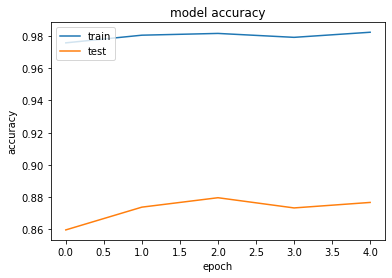

In [58]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()